In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [59]:
df = pd.read_csv('data/data/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [60]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [61]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [62]:
df.shape

(3755, 11)

In [63]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [64]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'On-site', 0:'Remote', 50:'Hybrid'})
df['company_size'] = df['company_size'].replace({'L': 'Large', 'M':'Medium', 'S':'Small'})

In [65]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,On-site,ES,Large
1,2023,Mid-level,Contractual,ML Engineer,30000,USD,30000,US,On-site,US,Small
2,2023,Mid-level,Contractual,ML Engineer,25500,USD,25500,US,On-site,US,Small
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,On-site,CA,Medium
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,On-site,CA,Medium


In [66]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 11)

In [67]:
df = df.drop_duplicates(keep='last')

In [68]:
df = df.drop(['salary_currency', 'salary'], axis=1)

In [69]:
df.shape

(2584, 9)

In [70]:
top_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
top_salary.head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
Director of Data Science,195140.73
Principal Data Engineer,192500.00
Machine Learning Software Engineer,192420.00
Applied Scientist,190342.58


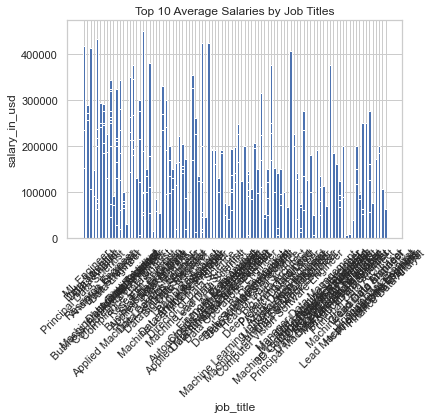

In [71]:
fig, ax = plt.subplots()
ax.bar(df['job_title'], df['salary_in_usd'])
ax.set_title('Top 10 Average Salaries by Job Titles')
ax.set_xlabel('job_title')
ax.set_ylabel('salary_in_usd')
plt.xticks(rotation=45)
plt.show()

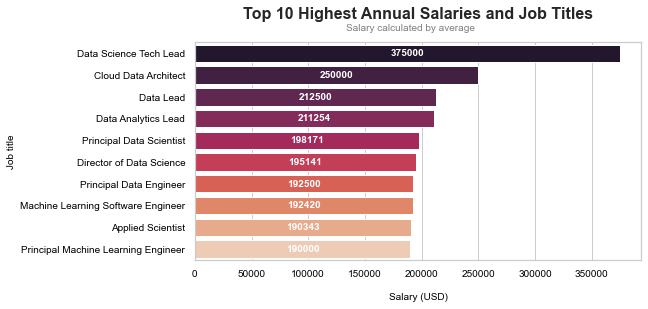

In [75]:
plt.figure(figsize=(8,4))

sns.set(style="whitegrid")
ax= sns.barplot(y = top_salary.index, x ='salary_in_usd', 
            data = top_salary,           
            palette = "rocket",
            )
            
plt.title('Top 10 Highest Annual Salaries and Job Titles\n', fontsize=16, fontweight="bold", loc="center")
plt.suptitle("\nSalary calculated by average\n", fontsize = 10, color="gray")
plt.xlabel('\nSalary (USD)', color="black", fontsize=10)
plt.ylabel('Job title', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")

plt.show()